<a href="https://colab.research.google.com/github/notsuperhero/Placement_ml/blob/main/end_to_end_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('placement.csv')

In [7]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [8]:
df.shape


(100, 4)

In [9]:
df = df.iloc[:,1:] #preprocessing

In [10]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [11]:
import matplotlib.pyplot as plt

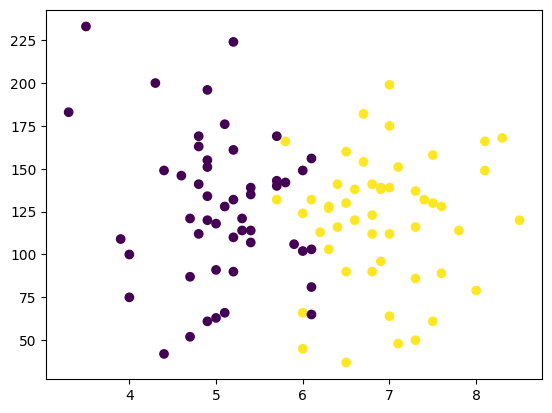

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement']) #EDA

In [13]:
X=df.iloc[:,0:2]#Extract input output Columns
Y=df.iloc[:,-1]

In [14]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
Y.shape

(100,)

In [16]:
from sklearn.model_selection import train_test_split#Train the test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [17]:
X_test

,cgpa,iq
52,7.0,175.0
57,6.5,130.0
44,7.5,61.0
90,7.3,86.0
95,4.3,200.0
2,5.3,121.0
64,7.0,64.0
98,6.3,103.0
94,4.7,52.0
75,4.8,169.0


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_train

array([[ 1.86002657,  0.63993702],
       [ 1.7721974 , -1.18184482],
       [ 0.01561407, -2.06671028],
       [-0.95050676, -0.11480117],
       [-0.24787343,  0.40570792],
       [ 0.10344324,  0.19750428],
       [ 1.86002657,  1.08236975],
       [ 0.7182474 , -0.03672481],
       [ 0.36693074,  0.43173338],
       [ 0.01561407, -1.52017573],
       [-0.68701926, -0.89556481],
       [-0.95050676,  0.69198792],
       [-0.51136092, -0.2709539 ],
       [-1.12616509, -0.08877572],
       [-0.51136092, -0.45313208],
       [ 2.0356849 ,  1.13442066],
       [ 1.33305157,  0.87416611],
       [ 0.01561407, -0.01069935],
       [-1.03833592,  0.43173338],
       [ 0.54258907, -0.11480117],
       [-0.68701926,  0.19750428],
       [-0.86267759, -0.86953936],
       [ 1.15739324, -1.936583  ],
       [-0.51136092,  0.27558065],
       [ 0.01561407,  0.63993702],
       [ 1.15739324,  0.32763156],
       [ 2.21134323, -0.11480117],
       [ 0.27910157,  0.09340247],
       [ 1.33305157,

In [22]:
X_test = scaler.transform(X_test)

In [23]:
X_test

array([[ 0.89390574,  1.31659884],
       [ 0.45475991,  0.14545337],
       [ 1.33305157, -1.650303  ],
       [ 1.15739324, -0.99966663],
       [-1.47748175,  1.96723521],
       [-0.59919009, -0.08877572],
       [ 0.89390574, -1.57222664],
       [ 0.27910157, -0.5572339 ],
       [-1.12616509, -1.8845321 ],
       [-1.03833592,  1.16044611]])

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression()

In [26]:
clf.fit(X_train,Y_train) #model Training

LogisticRegression()

In [32]:
y_pred = clf.predict(X_test)

In [33]:
Y_test

,placement
52,1
57,1
44,1
90,1
95,0
2,0
64,1
98,1
94,0
75,0


In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(Y_test,y_pred)

1.0

In [36]:
from mlxtend.plotting import plot_decision_regions #Decision Boundary

<Axes: >

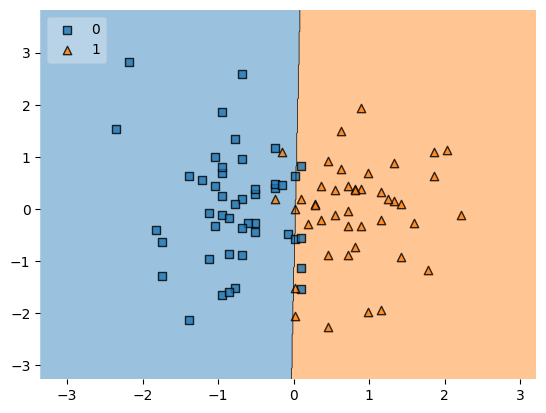

In [37]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [38]:
import pickle

In [41]:
pickle.dump(clf,open('model.pkl','wb'))